In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import warnings

warnings.filterwarnings("ignore")

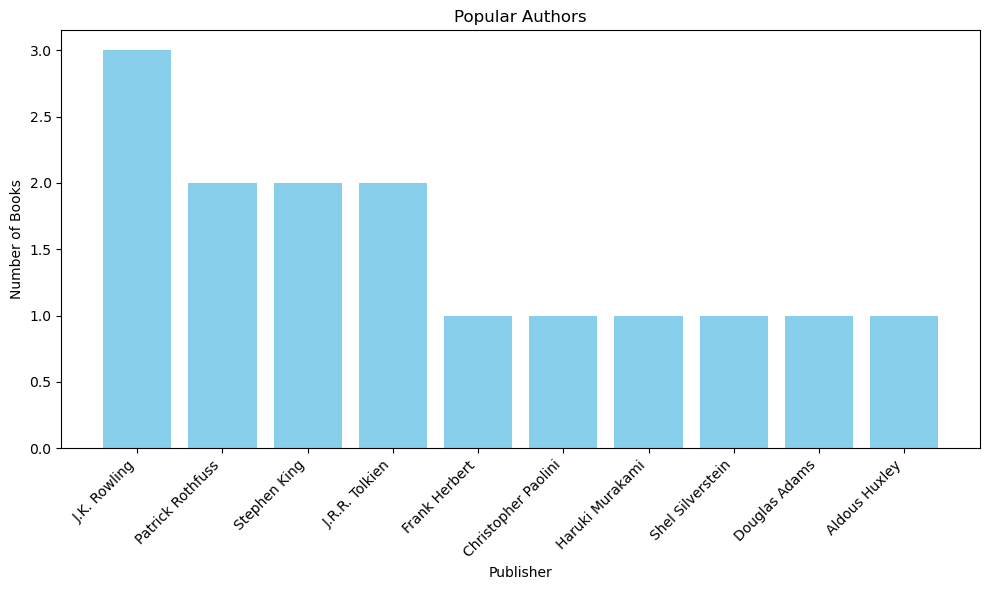

In [3]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='alexsql404',
    database='library'
)


cursor = conn.cursor()


query = """
    SELECT a.book_authors_AuthorName, COUNT(*) AS book_count
FROM authors a
GROUP BY a.book_authors_AuthorName
ORDER BY book_count DESC
LIMIT 10;

"""
cursor.execute(query)


results = cursor.fetchall()

cursor.close()
conn.close()

publishers = [result[0] for result in results]
book_counts = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(publishers, book_counts, color='skyblue')
plt.title('Popular Authors')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Borrower Activity

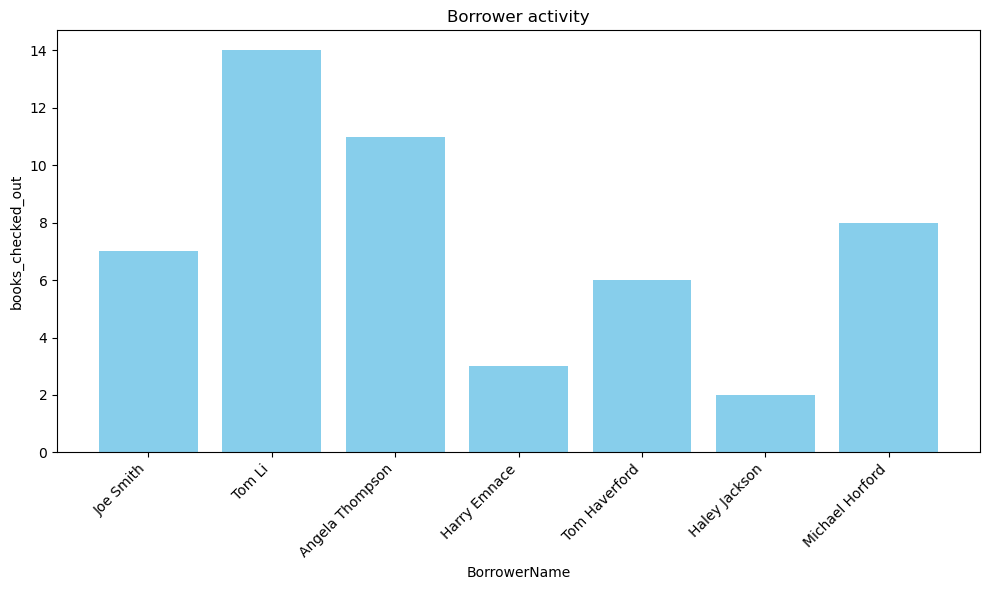

In [4]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='alexsql404',
    database='library'
)

cursor = conn.cursor()

query = """
    SELECT b.borrower_BorrowerName, COUNT(bl.book_loans_BookID) AS books_checked_out
FROM borrower b
JOIN book_loans bl ON b.borrower_CardNo = bl.book_loans_CardNo
GROUP BY b.borrower_BorrowerName;

"""
cursor.execute(query)

results = cursor.fetchall()

cursor.close()
conn.close()

publishers = [result[0] for result in results]
book_counts = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(publishers, book_counts, color='skyblue')
plt.title('Borrower activity')
plt.xlabel('BorrowerName')
plt.ylabel('books_checked_out')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Books Loaned per Branch

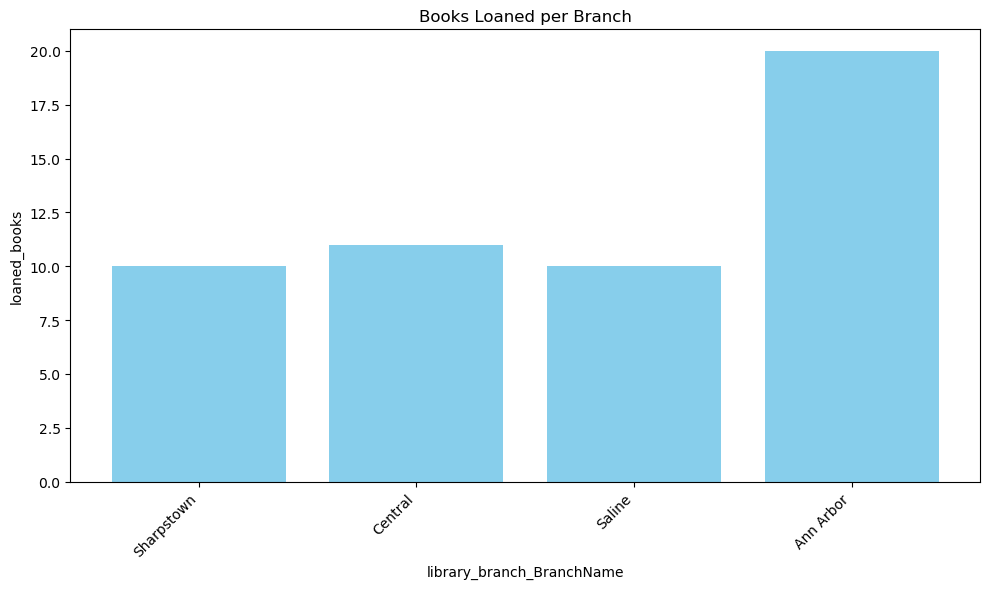

In [5]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='alexsql404',
    database='library'
)

cursor = conn.cursor()

query = """
    SELECT lb.library_branch_BranchName, COUNT(*) AS loaned_books
FROM library_branch lb
JOIN book_loans bl ON lb.library_branch_BranchID = bl.book_loans_BranchID
GROUP BY lb.library_branch_BranchName;

"""
cursor.execute(query)

results = cursor.fetchall()

cursor.close()
conn.close()

publishers = [result[0] for result in results]
book_counts = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(publishers, book_counts, color='skyblue')
plt.title('Books Loaned per Branch')
plt.xlabel('library_branch_BranchName')
plt.ylabel('loaned_books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 1 

In [6]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='alexsql404',
    database='library'
)

table_name = 'BOOK_LOANs'

query = f"SELECT * FROM {table_name}"

df = pd.read_sql(query, conn)

print(df.head())



   book_loans_LoansID  book_loans_BookID  book_loans_BranchID  \
0                  52                  1                    1   
1                  53                  2                    1   
2                  54                  3                    1   
3                  55                  4                    1   
4                  56                  5                    1   

   book_loans_CardNo book_loans_DateOut book_loans_DueDate  
0                100             1/1/18             2/2/18  
1                100             1/1/18             2/2/18  
2                100             1/1/18             2/2/18  
3                100             1/1/18             2/2/18  
4                102             1/3/18             2/3/18  


# 2

In [7]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='alexsql404',
    database='library'
)

table_name = 'BOOK'

query = f"SELECT * FROM {table_name}"

df_book = pd.read_sql(query, conn)

print(df_book.head())



   book_BookID            book_Title    book_PublisherName
0            1  The Name of the Wind             DAW Books
1            2                    It                Viking
2            3        The Green Mile          Signet Books
3            4                  Dune         Chilton Books
4            5            The Hobbit  George Allen & Unwin


# 3

In [8]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='alexsql404',
    database='library'
)

table_name = 'borrower'

query = f"SELECT * FROM {table_name}"

df_borrower= pd.read_sql(query, conn)

print(df_borrower.head())



   borrower_CardNo borrower_BorrowerName  \
0              100             Joe Smith   
1              101            Jane Smith   
2              102                Tom Li   
3              103       Angela Thompson   
4              104          Harry Emnace   

                 borrower_BorrowerAddress borrower_BorrowerPhone  
0     1321 4th Street, New York, NY 10014           212-312-1234  
1     1321 4th Street, New York, NY 10014           212-931-4124  
2    981 Main Street, Ann Arbor, MI 48104           734-902-7455  
3  2212 Green Avenue, Ann Arbor, MI 48104           313-591-2122  
4     121 Park Drive, Ann Arbor, MI 48104           412-512-5522  


# 4

In [9]:
conn = mysql.connector.connect(
    host='127.0.0.1',
    user='root',
    password='alexsql404',
    database='library'
)


table_name = 'library_branch'

query = f"SELECT * FROM {table_name}"

df_branch= pd.read_sql(query, conn)

print(df_branch.head())



   library_branch_BranchID library_branch_BranchName  \
0                        1                Sharpstown   
1                        2                   Central   
2                        3                    Saline   
3                        4                 Ann Arbor   

  library_branch_BranchAddress  
0               32 Corner Road  
1               491 3rd Street  
2              40 State Street  
3         101 South University  


In [10]:
df.columns

Index(['book_loans_LoansID', 'book_loans_BookID', 'book_loans_BranchID',
       'book_loans_CardNo', 'book_loans_DateOut', 'book_loans_DueDate'],
      dtype='object')

In [11]:
df_book.columns

Index(['book_BookID', 'book_Title', 'book_PublisherName'], dtype='object')

In [12]:
df_borrower.columns

Index(['borrower_CardNo', 'borrower_BorrowerName', 'borrower_BorrowerAddress',
       'borrower_BorrowerPhone'],
      dtype='object')

In [13]:
df_branch.columns

Index(['library_branch_BranchID', 'library_branch_BranchName',
       'library_branch_BranchAddress'],
      dtype='object')

# merge table 1

In [14]:
merged_df = pd.merge(df, df_borrower, left_on='book_loans_CardNo', right_on='borrower_CardNo', how='inner')

print(merged_df)


    book_loans_LoansID  book_loans_BookID  book_loans_BranchID  \
0                   52                  1                    1   
1                   53                  2                    1   
2                   54                  3                    1   
3                   55                  4                    1   
4                   67                 19                    2   
5                   70                  2                    2   
6                   71                  3                    2   
7                   56                  5                    1   
8                   57                  6                    1   
9                   58                  7                    1   
10                  59                  8                    1   
11                  60                  9                    1   
12                  61                 11                    1   
13                  74                  7                    3   
14        

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   book_loans_LoansID        51 non-null     int64 
 1   book_loans_BookID         51 non-null     int64 
 2   book_loans_BranchID       51 non-null     int64 
 3   book_loans_CardNo         51 non-null     int64 
 4   book_loans_DateOut        51 non-null     object
 5   book_loans_DueDate        51 non-null     object
 6   borrower_CardNo           51 non-null     int64 
 7   borrower_BorrowerName     51 non-null     object
 8   borrower_BorrowerAddress  51 non-null     object
 9   borrower_BorrowerPhone    51 non-null     object
dtypes: int64(5), object(5)
memory usage: 4.1+ KB


# Loan Trends Over Time

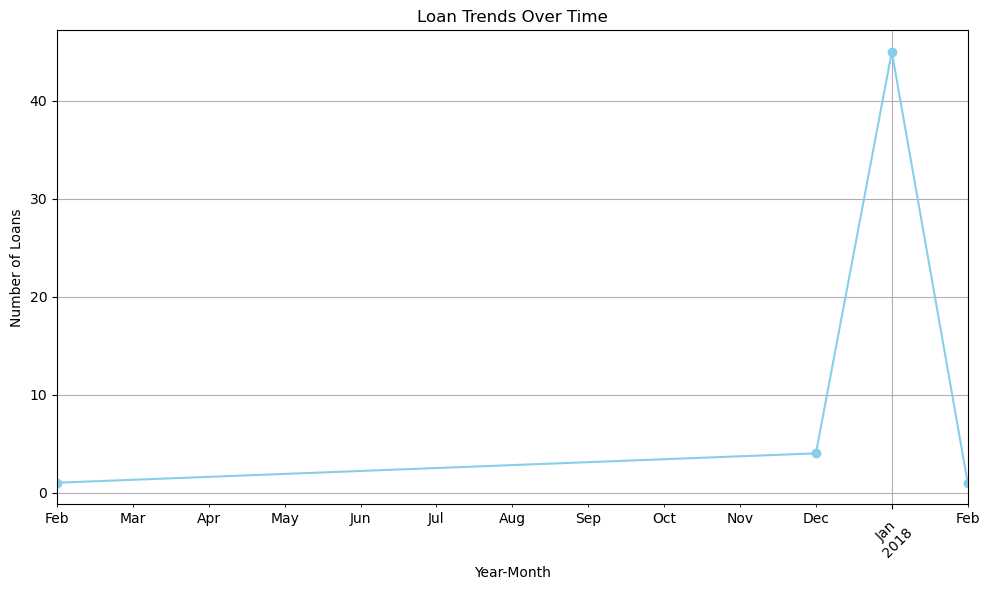

In [16]:
merged_df['book_loans_DateOut'] = pd.to_datetime(merged_df['book_loans_DateOut'])

merged_df['loan_year_month'] = merged_df['book_loans_DateOut'].dt.to_period('M')

loan_trends = merged_df.groupby('loan_year_month').size()

plt.figure(figsize=(10, 6))
loan_trends.plot(marker='o', color='skyblue', linestyle='-')
plt.title('Loan Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
loan_trends

loan_year_month
2017-02     1
2017-12     4
2018-01    45
2018-02     1
Freq: M, dtype: int64

# Loan Trends:
The data shows fluctuations in the number of book loans over time, with some months having higher loan counts than others.

# Peak Month:
The month of January 2018 stands out with a significantly higher number of loans (45 loans) compared to other months in the dataset.
    
# Low Activity:
Some months have relatively low loan counts, such as February 2017 and February 2018, where only one loan was recorded.
    
# Overall Trend: 
While the dataset spans a limited time period, we can see variations in loan activity over the months, indicating potential patterns or trends in borrowing behavior.

In [18]:
merged_df.columns

Index(['book_loans_LoansID', 'book_loans_BookID', 'book_loans_BranchID',
       'book_loans_CardNo', 'book_loans_DateOut', 'book_loans_DueDate',
       'borrower_CardNo', 'borrower_BorrowerName', 'borrower_BorrowerAddress',
       'borrower_BorrowerPhone', 'loan_year_month'],
      dtype='object')

# Borrower Demographics

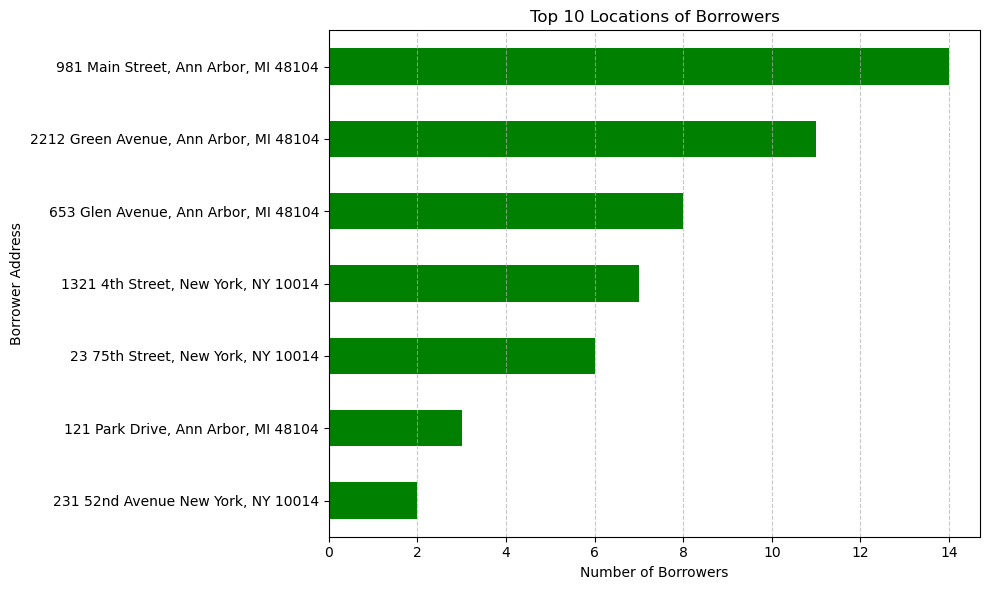

In [19]:
location_distribution = merged_df['borrower_BorrowerAddress'].value_counts().head(10) 

plt.figure(figsize=(10, 6))
location_distribution.sort_values().plot(kind='barh', color='green')
plt.title('Top 10 Locations of Borrowers')
plt.xlabel('Number of Borrowers')
plt.ylabel('Borrower Address')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [20]:
merged_df['book_loans_DateOut'] = pd.to_datetime(merged_df['book_loans_DateOut'])
merged_df['book_loans_DueDate'] = pd.to_datetime(merged_df['book_loans_DueDate'])

merged_df['loan_duration'] = (merged_df['book_loans_DueDate'] - merged_df['book_loans_DateOut']).dt.days



<Axes: xlabel='loan_duration'>

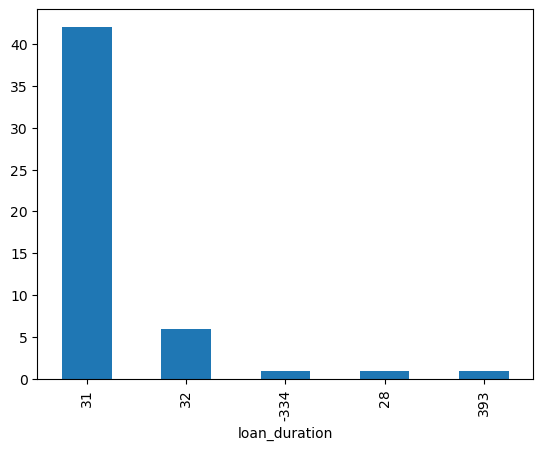

In [21]:
merged_df['loan_duration'].value_counts().plot(kind="bar")

## Duration
31 Days: There are 42 loans with a duration of 31 days.

32 Days: There are 6 loans with a duration of 32 days.

-334 Days: There is 1 loan with a negative duration of -334 days.

28 Days: There is 1 loan with a duration of 28 days.

393 Days: There is 1 loan with a duration of 393 days.

# Popular Books

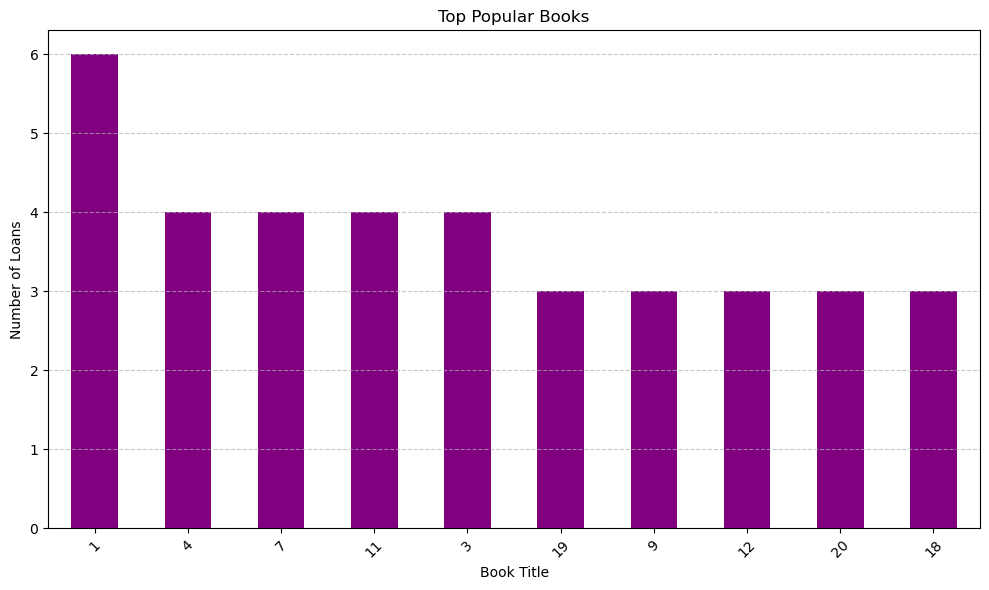

In [22]:
popular_books = merged_df['book_loans_BookID'].value_counts()

top_popular_books = popular_books.head(10)

plt.figure(figsize=(10, 6))
top_popular_books.plot(kind='bar', color='purple')
plt.title('Top Popular Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## BOOKS NAMES
1	The Name of the Wind

4	Dune

6	Eragon

11	The Hitchhikers Guide to the Galaxy

3	The Green Mile

19	A Game of Thrones

9	Hard Boiled Wonderland and The End of the World

12	Brave New World

20	The Lost Tribe

18	The Fellowship of the Ring

# merged  table 2

In [23]:
df2= pd.merge(df, df_book, left_on='book_loans_BookID', right_on='book_BookID', how='inner')

print(df2)


    book_loans_LoansID  book_loans_BookID  book_loans_BranchID  \
0                   52                  1                    1   
1                   69                  1                    2   
2                   84                  1                    4   
3                   92                  1                    4   
4                   94                  1                    4   
5                  102                  1                    4   
6                   53                  2                    1   
7                   70                  2                    2   
8                   54                  3                    1   
9                   71                  3                    2   
10                  85                  3                    4   
11                  95                  3                    4   
12                  55                  4                    1   
13                  73                  4                    3   
14        

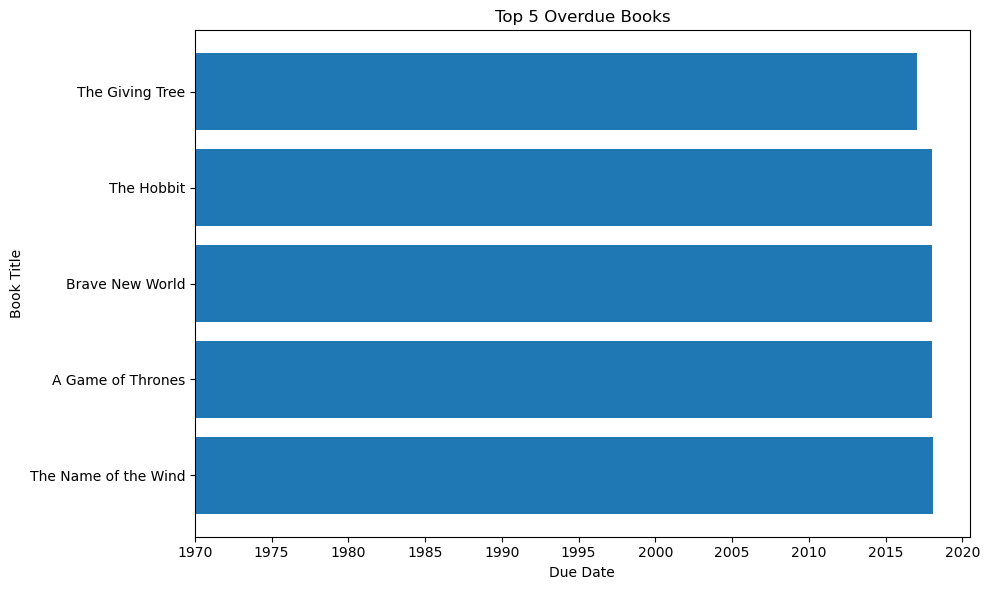

In [24]:
df2['book_loans_DueDate'] = pd.to_datetime(df2['book_loans_DueDate'])

current_date = pd.to_datetime('today')

df2['book_loans_DueDate'] = df2['book_loans_DueDate'].fillna(current_date)

overdue_books = df2[df2['book_loans_DueDate'] < current_date]

overdue_books_sorted = overdue_books.sort_values(by='book_loans_DueDate')

top_5_overdue_books = overdue_books_sorted.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_overdue_books['book_Title'], top_5_overdue_books['book_loans_DueDate'])
plt.xlabel('Due Date')
plt.ylabel('Book Title')
plt.title('Top 5 Overdue Books')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

## insight
if there is no information available about whether the books have been returned or not ( no updated data),so we can assume that the due date is the current date for the purpose of identifying overdue books.

In such cases, we would compare the due date (book_loans_DueDate) with the current date to determine if the books are overdue. If the due date is earlier than the current date, it indicates that the books are overdue.